In [1]:
pip install control

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import control
import matplotlib.pyplot as plt

In [3]:
# Define transfer function of the system
s = control.tf('s')

## Process

In [4]:
Kp = 30
Tau = 520
sys  = Kp/(Tau*s + 1)
sys

TransferFunction(array([30]), array([520,   1]))

## Second Order Pade Approximation / Dead Time

In [5]:
Delay = 200 
num, den = control.pade(Delay, n=2, numdeg=0)
Pade = control.tf(num, den)
Pade

TransferFunction(array([5.e-05]), array([1.e+00, 1.e-02, 5.e-05]))

## FOPDT

In [6]:
FOPDT = control.series(Pade, sys)
FOPDT

TransferFunction(array([0.0015]), array([5.2e+02, 6.2e+00, 3.6e-02, 5.0e-05]))

In [7]:
# Simulate step response
t, y = control.step_response(FOPDT, T=2500, T_num=2501)

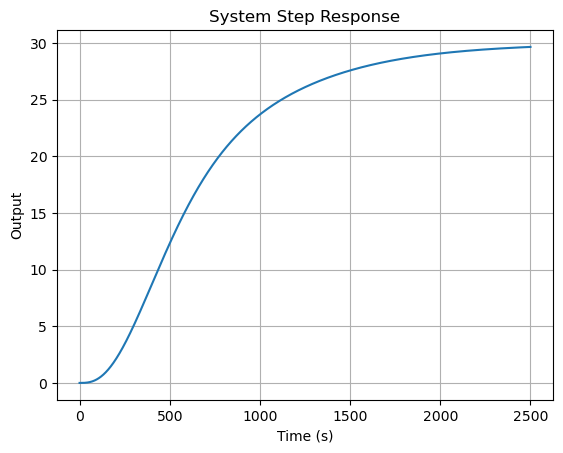

In [8]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()

## Export Data

In [9]:
import pandas as pd
import numpy as np

In [10]:
t = np.transpose(t)
y = np.transpose(y)

In [11]:
df = pd.DataFrame({'t':t, 'y':y})

In [12]:
df.to_excel("FOPDT.xlsx", index=False)  